
# Stock Performance Analysis

This Python script, designed to be run in a Jupyter Notebook, analyzes and visualizes the performance of selected stocks over the past two years. It fetches historical data for Apple (AAPL), Amazon (AMZN), and the QQQ ETF using the `yfinance` library, calculates their cumulative logarithmic returns, and plots them for a comparative performance analysis.

## Key Features

- Fetches historical stock data from Yahoo Finance for a specified period.
- Calculates daily logarithmic returns to analyze price changes.
- Computes and visualizes cumulative returns to track performance over time.
- Allows for easy comparison of different stock performances on a single chart.

## Requirements

To run this script, you need Python 3 and the following libraries:

- `yfinance`
- `pandas`
- `numpy`
- `matplotlib`
- `jupyter` (or any environment that can run `.ipynb` files, like VS Code with the Python extension).

## Installation

You can install the required libraries using `pip`. Open your terminal or command prompt and run the following command:

```bash
pip install yfinance pandas numpy matplotlib jupyterlab

In [105]:
# Import necessary libraries for data manipulation, analysis, and visualization
import yfinance as yf
import numpy as np
import datetime as dt

import pandas as pd
from docutils.nodes import title
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt


In [106]:
# Define the time period for stock data analysis (last two years)
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*2)
start_date, end_date


(datetime.datetime(2023, 8, 30, 21, 27, 17, 149882),
 datetime.datetime(2025, 8, 29, 21, 27, 17, 149882))

In [107]:
# Define the list of stock tickers to analyze
stocks = ['AAPL', 'AMZN', 'QQQ']
# Download historical stock data for the specified tickers and date range
df =  yf.download(stocks, start=start_date, end=end_date)
df.head()

C:\Users\parsa\AppData\Local\Temp\ipykernel_18760\2662312434.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df =  yf.download(stocks, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker            AAPL        AMZN         QQQ        AAPL        AMZN   
Date                                                                     
2023-08-31  186.047638  138.009995  373.292511  187.285513  138.789993   
2023-09-01  187.622284  138.119995  372.897430  188.077814  139.960007   
2023-09-05  187.859924  137.270004  373.371521  188.137207  137.800003   
2023-09-06  181.135788  135.360001  370.082855  187.018173  137.449997   
2023-09-07  175.837677  137.850006  367.436157  176.481381  138.029999   

Price                          Low                                Open  \
Ticker             QQQ        AAPL        AMZN         QQQ        AAPL   
Date                                                                     
2023-08-31  375.001022  185.661422  135.000000  372.186435  186.017930   
2023-09-01  376.097155  186.453722  136.880005  371.406187  187.651992   
2023-09-05  374.596101  185.790201  135.820007  371.159338  186.453700   
2023-09-06  372.936954  179.709753  134.610001  368.068229  186.572526   
2023-09-07  368.216348  171.856667  133.160004  364.562318  173.480758   

Price                                  Volume                      
Ticker            AMZN         QQQ       AAPL      AMZN       QQQ  
Date                                                               
2023-08-31  135.059998  372.255572   60794500  58781300  35730700  
2023-09-01  139.460007  375.672506   45766500  40991500  39801200  
2023-09-05  137.729996  372.087659   45280000  40636700  32344200  
2023-09-06  136.320007  372.591297   81755800  41785500  42998700  
2023-09-07  133.899994  365.609142  112488800  48498900  52060700

In [108]:
# Extract the 'Close' prices for each stock from the downloaded data
close = df['Close']
close.head()

Ticker,AAPL,AMZN,QQQ
Date,,,
2023-08-31,186.047638,138.009995,373.292511
2023-09-01,187.622284,138.119995,372.897430
2023-09-05,187.859924,137.270004,373.371521
2023-09-06,181.135788,135.360001,370.082855
2023-09-07,175.837677,137.850006,367.436157


In [109]:
# Calculate the daily logarithmic returns of the closing prices
log_returns = np.log(close / close.shift(1))
log_returns.head()

Ticker,AAPL,AMZN,QQQ
Date,,,
2023-08-31,NaN,NaN,NaN
2023-09-01,0.008428,0.000797,-0.001059
2023-09-05,0.001266,-0.006173,0.001271
2023-09-06,-0.036450,-0.014012,-0.008847
2023-09-07,-0.029686,0.018228,-0.007177


In [110]:
# Calculate the cumulative logarithmic returns to see performance over time
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.head()

Ticker,AAPL,AMZN,QQQ
Date,,,
2023-08-31,NaN,NaN,NaN
2023-09-01,0.008428,0.000797,-0.001059
2023-09-05,0.009694,-0.005376,0.000212
2023-09-06,-0.026756,-0.019388,-0.008635
2023-09-07,-0.056441,-0.001160,-0.015813


<Axes: title={'center': 'cumulative_returns'}, xlabel='Date'>

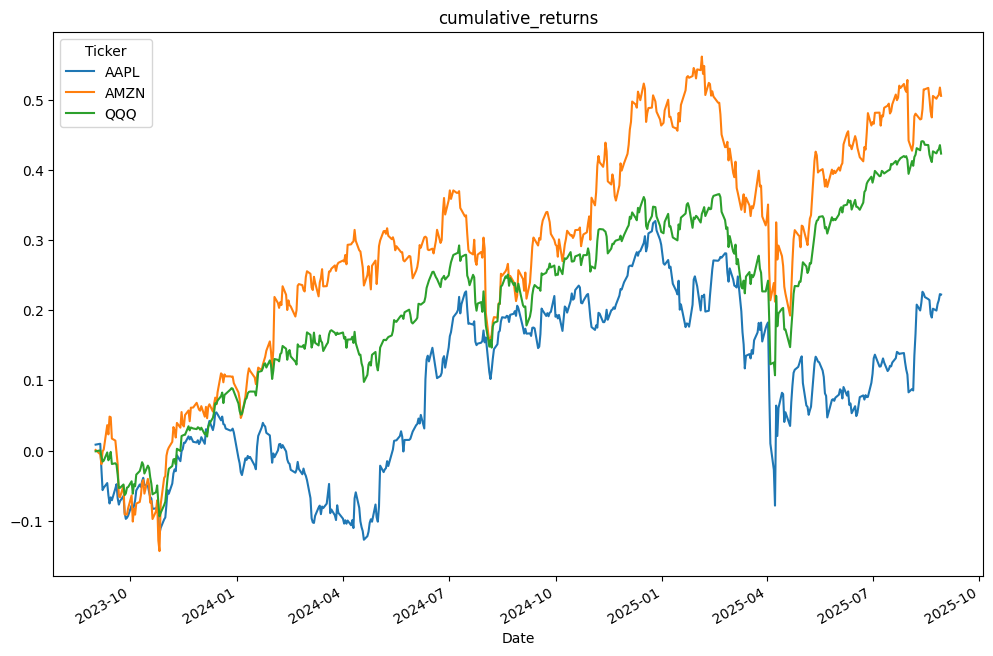

In [111]:
# Plot the cumulative logarithmic returns to visualize and compare stock performance
cumulative_log_returns.plot(title = 'cumulative_returns' ,figsize=(12, 8))